# Problem Statement 

**----------------------------------------------------------------------------------------------------------------------------**

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for **working professionals better.** MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with **low work life balance**. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a **high drop off between “Registration” and Number of people taking tests at the Camps.** In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

#### The Process:

* MedCamp employees / volunteers reach out to people and drive registrations.
* During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.

#### Other things to note:

* Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
* For a few camps, there was hardware failure, so some information about date and time of registration is lost.
* MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

#### Favorable outcome:

* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* You need to predict the chances (probability) of having a favourable outcome.

In [1]:
#If Health~1>0 or helath~2>0 or visited~3-- YES, NO

In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

pd.set_option("display.max_columns",None)

In [3]:
# reading the data files in train,test and submission variables

train=pd.read_csv(r"D:\Case Study\Residency Day 2\Train.csv")
test=pd.read_csv(r"D:\Case Study\Residency Day 2\test_l0Auv8Q.csv")
submission=pd.read_csv(r'D:\Case Study\Residency Day 2\sample_submmission.csv')

In [4]:
# Import the additional files for the dataset

fhc=pd.read_csv(r"First_Health_Camp_Attended.csv")
shc=pd.read_csv("Second_Health_Camp_Attended.csv")
thc=pd.read_csv("Third_Health_Camp_Attended.csv")
hc=pd.read_csv("Health_Camp_Detail.csv")
pp=pd.read_csv("Patient_Profile.csv")

In [5]:
# Combining the data  of train and test

combined=pd.concat([train,test],ignore_index=True)

In [6]:
# displaying the columns present in pp tabel

pp.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [7]:
# lets join patient profile to the combiined dataset

combined=pd.merge(combined,pp,on=["Patient_ID"],how="left")

In [8]:
# Displaying the columns present in first health camp table

fhc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4'],
      dtype='object')

In [9]:
# lets join first health camps to the combiined dataset

combined=pd.merge(combined,fhc,on=["Patient_ID","Health_Camp_ID"],how="left")

In [10]:
# Displaying the columns present in second health camp table

shc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Health Score'], dtype='object')

In [11]:
# lets join second health camps to the combiined dataset

combined=pd.merge(combined,shc,on=["Patient_ID","Health_Camp_ID"],how="left")

In [12]:
# lets join third health camps to the combined dataset

combined=pd.merge(combined,thc,on=["Patient_ID","Health_Camp_ID"],how="left")

In [13]:
# shape of our combined table

combined.shape

(110527, 24)

In [14]:
# healthcare detail of columns

hc.columns

Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3'],
      dtype='object')

In [15]:
# lets join thealthcare to the combined dataset

combined=pd.merge(combined,hc,on=["Health_Camp_ID"],how="left")

In [16]:
# shape of our combined table

combined.shape

(110527, 29)

In [17]:
# deleting the extra dataset which we didnt need

del  pp,fhc,shc,hc

In [18]:
# Preview the dataset

combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [19]:
# Making a new column name social media  from the column present in tha combined table

combined["Social_Media"]=combined.Online_Follower+combined.LinkedIn_Shared+combined.Twitter_Shared+combined.Facebook_Shared

In [20]:
#changing the data type of the columns

combined[["Registration_Date","First_Interaction","Camp_Start_Date","Camp_End_Date"]]=\
combined[["Registration_Date","First_Interaction","Camp_Start_Date","Camp_End_Date"]].apply(pd.to_datetime)

# another way 

#combined['Camp_Start_Date']=pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)
#combined['Camp_End_Date']=pd.to_datetime(combined.Camp_End_Date,dayfirst=True)
# and so on

In [21]:
# Short summary of combined table

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Patient_ID                 110527 non-null  int64         
 1   Health_Camp_ID             110527 non-null  int64         
 2   Registration_Date          110193 non-null  datetime64[ns]
 3   Var1                       110527 non-null  int64         
 4   Var2                       110527 non-null  int64         
 5   Var3                       110527 non-null  int64         
 6   Var4                       110527 non-null  int64         
 7   Var5                       110527 non-null  int64         
 8   Online_Follower            110527 non-null  int64         
 9   LinkedIn_Shared            110527 non-null  int64         
 10  Twitter_Shared             110527 non-null  int64         
 11  Facebook_Shared            110527 non-null  int64   

In [22]:
# creating a new variable intrection days by subtracting Registration_Date from First_Interaction

combined["Intrection_Days"]=combined.Registration_Date-combined.First_Interaction

In [23]:
# Remove days from the new variable created 

combined["Intrection_Days"]=combined.Intrection_Days.dt.days

In [24]:
# camp duration

combined["Camp_Duration"]=(combined.Camp_End_Date-combined.Camp_Start_Date).dt.days

In [25]:
combined["magic1"]=abs((combined.Camp_Start_Date-combined.Registration_Date).dt.days)

In [26]:
combined["magic2"]=abs((combined.Camp_End_Date-combined.Registration_Date).dt.days)

In [27]:
combined["Patient_Duration"]=abs((combined.Camp_End_Date-combined.First_Interaction).dt.days)

In [28]:
# First Intrection>> Registration >> Camp is org
# person comes>> health camp>> health score else stall visit
# first intrection date >> registration date >>  camp date
# camp end date >> camp start date >> registration date

In [29]:
# defing the function dates_between

def dates_between(start,reg,end):
    if(end>start>reg):
        return 1
    else:
        return 0

In [30]:
# extracting the column dates seq 

combined["dates_seq"]=combined.apply(lambda x: dates_between(x["Camp_Start_Date"],
                                                             x["Registration_Date"],x["Camp_End_Date"]),axis=1)

In [31]:
#  extracting the days months and year from the exsiting columns

combined["Registration_Days"]=combined.Registration_Date.dt.day
combined["Registration_Month"]=combined.Registration_Date.dt.month
combined["Registration_Year"]=combined.First_Interaction.dt.year

In [32]:
# extracting the years from the columns

combined["Camp_Start_Year"]=combined.Camp_Start_Date.dt.year
combined["Camp_End_Year"]=combined.Camp_End_Date.dt.year
combined["First_Interaction_Year"]=combined.Camp_End_Date.dt.year


In [33]:
# making a new variable of patient per day in a camp

combined["Patient_Per_Day"]=combined.groupby(by="Registration_Days")["Patient_ID"].transform("nunique")

In [34]:
# making a new variable of patient per month in a camp

combined["Patient_Per_Month"]=combined.groupby(by="Registration_Month")["Patient_ID"].transform("nunique")

In [35]:
# making a new variable of patient per year in a camp

combined["Patient_Per_Year"]=combined.groupby(by="Registration_Year")["Patient_ID"].transform("nunique")

In [36]:
# patient frequnecy day month and year wise


combined["Patient_Frequency_Per_Day"]=combined.groupby(by="Patient_ID")["Registration_Days"].transform("nunique")
combined["Patient_Frequency_Per_Month"]=combined.groupby(by="Patient_ID")["Registration_Month"].transform("nunique")
combined["Patient_Frequency_Per_Year"]=combined.groupby(by="Patient_ID")["Registration_Year"].transform("nunique")

In [37]:
# no of patient in health camps

combined["Patient_Frequency_HC"]=combined.groupby(by="Health_Camp_ID")["Patient_ID"].transform("nunique")

In [38]:
# no of camps

combined["Health_Camps_Year"]=combined.groupby(by="Camp_End_Year")["Health_Camp_ID"].transform("nunique")

In [39]:
# if the health score > 0 or health score > 0 or num of stall vistied >0
# return 1 or else 0

In [40]:
# definging the function named it as tgt

def tgt(hs,hs_,stall_vist,stall_no):
    if((hs>0) or(hs_>0) or(stall_vist>0) or(stall_no>0)):
        return (1)
    else:
        return (0)

In [41]:
# making the target variable 

combined["Target"]=combined.apply(lambda x: tgt(x["Health_Score"],x["Health Score"],x["Number_of_stall_visited"],
                             x["Last_Stall_Visited_Number"]),axis=1)

In [42]:
# Droping the columns Patient_ID Health_Camp_ID	 Registration_Date Online_Follower LinkedIn_Shared ,Twitter_Shared 
#Facebook_Shared	

newdata = combined.drop(["Patient_ID", "Health_Camp_ID", "Registration_Date","Online_Follower", "LinkedIn_Shared" ,
                         "Twitter_Shared","Facebook_Shared","First_Interaction","Unnamed: 4","Camp_Start_Date",
                         "Camp_End_Date"],axis=1)

In [43]:
# value counts of city in our combined table 

newdata.City_Type.value_counts()

B    12242
H    10203
D     7881
C     6343
G     6298
E     6009
A     5905
I     4904
F     4140
Name: City_Type, dtype: int64

In [44]:
# applying the statistical test chi2_contingency

tbl=pd.crosstab(newdata.Target,newdata.City_Type)

teststats,pvalue,dof, exp_freq=stats.chi2_contingency(tbl)
print(pvalue)

1.1368161516371538e-10


In [45]:
# Apply frequency on cat1 ,cat2, cat3

newdata["Category1"]=pd.factorize(newdata.Category1)[0]
newdata["Category2"]=pd.factorize(newdata.Category2)[0]

In [46]:
# drop the donation column

newdata.drop("Donation",axis=1,inplace=True)

In [47]:
# replacing the none with nan

newdata.replace(to_replace='None',value=np.nan,inplace=True)

In [48]:
# drop the additional columns

newdata.drop(["Health_Score","Health Score","Number_of_stall_visited","Last_Stall_Visited_Number"],axis=1,inplace=True)# 

In [49]:
# applying the pd.factorize to fill the missing values and to give numerical value to each categorical columns

newdata.Income=pd.factorize(newdata.Income)[0]
newdata.Education_Score=pd.factorize(newdata.Education_Score)[0]
newdata.City_Type=pd.factorize(newdata.City_Type)[0]
newdata.Employer_Category=pd.factorize(newdata.Employer_Category)[0]

In [50]:
# applying the statistical test chi2_contingency

tbl=pd.crosstab(newdata.Target,newdata.Age)

teststats,pvalue,dof, exp_freq=stats.chi2_contingency(tbl)
print(pvalue)

3.152227300705479e-06


In [51]:
# converting the age into float and applying the pd.factorize

newdata.Age=newdata.Age.astype(np.number)
newdata.Age=pd.factorize(newdata.Age)[0]

In [52]:
# displaying the columns that doesnt contain null values

newdata.isnull().sum()[newdata.isnull().sum()!=0].index

Index(['Intrection_Days', 'magic1', 'magic2', 'Registration_Days',
       'Registration_Month', 'Patient_Per_Day', 'Patient_Per_Month'],
      dtype='object')

In [53]:
# filling the null values with median of categorical variables

cols=['Intrection_Days', 'magic1', 'magic2', 'Registration_Days','Registration_Month', 'Registration_Year', 'Patient_Per_Day',
      'Patient_Per_Month', 'Patient_Per_Year']

for i in cols:
    newdata.loc[:,i].fillna(newdata.loc[:,i].median(),inplace=True)

# Modeling

In [54]:
# Split the data in train test in newtrain and newtest

newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]

In [55]:
# drop the target variable from train test

X=newtrain.drop("Target",axis=1)
newtest=newtest.drop("Target",axis=1)
y=newtrain.Target

In [56]:
# importing the necessary library

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import f1_score


In [57]:
# deifng the base model for applying all the models

def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["tree"]=DecisionTreeClassifier(criterion="entropy")
    models["rf"]=RandomForestClassifier(criterion="entropy")
    models["gbm"]=GradientBoostingClassifier()
    models["xgb"]=XGBClassifier()
    models["lgbm"]=LGBMClassifier()
    models["catboost"]=CatBoostClassifier()
    return models

In [58]:
# evaluation function

def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,scoring="roc_auc",cv=cv,error_score="raise",n_jobs=-1)
    return score

In [59]:
# applying all the models in one go

result,names=list(),list()
models=base_models()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f(%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.694(0.004)
tree 0.713(0.019)
rf 0.771(0.083)
gbm 0.794(0.082)
xgb 0.811(0.081)
lgbm 0.821(0.078)
catboost 0.830(0.075)


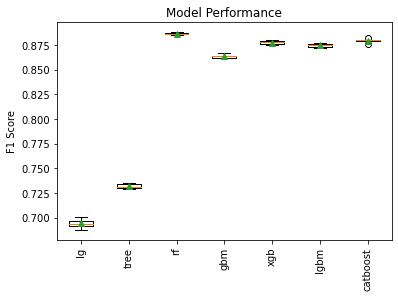

In [60]:
# visualization result of all our mdoels

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

In [61]:
# XGBClassifier model

xgb=XGBClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict_proba(newtest))

In [62]:
#pd.DataFrame(np.array(pred_xgb)[0])[1]

submission["Outcome"]=pd.DataFrame(np.array(pred_xgb)[0])[1]

In [63]:
# saving the model in our drive

submission.to_csv("XGBMODEL_HEALTH.csv",index=False)

In [64]:
cd

C:\Users\agarw


In [65]:
# CatBoostClassifier model

catboost=CatBoostClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_catboost=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_catboost.append(catboost.fit(xtrain,ytrain).predict_proba(newtest))

Learning rate set to 0.059277
0:	learn: 0.6538981	total: 159ms	remaining: 2m 38s
1:	learn: 0.6204329	total: 177ms	remaining: 1m 28s
2:	learn: 0.5952410	total: 191ms	remaining: 1m 3s
3:	learn: 0.5723756	total: 205ms	remaining: 50.9s
4:	learn: 0.5525349	total: 220ms	remaining: 43.8s
5:	learn: 0.5348336	total: 233ms	remaining: 38.5s
6:	learn: 0.5198959	total: 245ms	remaining: 34.7s
7:	learn: 0.5057583	total: 258ms	remaining: 32s
8:	learn: 0.4943198	total: 271ms	remaining: 29.8s
9:	learn: 0.4843747	total: 283ms	remaining: 28s
10:	learn: 0.4750737	total: 298ms	remaining: 26.8s
11:	learn: 0.4675219	total: 312ms	remaining: 25.7s
12:	learn: 0.4610606	total: 325ms	remaining: 24.7s
13:	learn: 0.4552103	total: 338ms	remaining: 23.8s
14:	learn: 0.4502712	total: 355ms	remaining: 23.3s
15:	learn: 0.4462471	total: 370ms	remaining: 22.7s
16:	learn: 0.4423238	total: 383ms	remaining: 22.1s
17:	learn: 0.4388185	total: 397ms	remaining: 21.7s
18:	learn: 0.4354971	total: 412ms	remaining: 21.3s
19:	learn: 0.

166:	learn: 0.3865960	total: 2.35s	remaining: 11.7s
167:	learn: 0.3865306	total: 2.37s	remaining: 11.7s
168:	learn: 0.3863700	total: 2.38s	remaining: 11.7s
169:	learn: 0.3862752	total: 2.39s	remaining: 11.7s
170:	learn: 0.3861988	total: 2.41s	remaining: 11.7s
171:	learn: 0.3860175	total: 2.42s	remaining: 11.7s
172:	learn: 0.3858843	total: 2.43s	remaining: 11.6s
173:	learn: 0.3857283	total: 2.45s	remaining: 11.6s
174:	learn: 0.3855422	total: 2.46s	remaining: 11.6s
175:	learn: 0.3854583	total: 2.48s	remaining: 11.6s
176:	learn: 0.3853051	total: 2.49s	remaining: 11.6s
177:	learn: 0.3852328	total: 2.51s	remaining: 11.6s
178:	learn: 0.3850545	total: 2.53s	remaining: 11.6s
179:	learn: 0.3849860	total: 2.54s	remaining: 11.6s
180:	learn: 0.3848838	total: 2.55s	remaining: 11.6s
181:	learn: 0.3847570	total: 2.57s	remaining: 11.6s
182:	learn: 0.3845596	total: 2.58s	remaining: 11.5s
183:	learn: 0.3844228	total: 2.6s	remaining: 11.5s
184:	learn: 0.3843585	total: 2.61s	remaining: 11.5s
185:	learn: 0

331:	learn: 0.3692263	total: 4.54s	remaining: 9.13s
332:	learn: 0.3691557	total: 4.55s	remaining: 9.12s
333:	learn: 0.3690453	total: 4.57s	remaining: 9.11s
334:	learn: 0.3689416	total: 4.58s	remaining: 9.09s
335:	learn: 0.3688199	total: 4.59s	remaining: 9.07s
336:	learn: 0.3687587	total: 4.61s	remaining: 9.06s
337:	learn: 0.3687083	total: 4.62s	remaining: 9.05s
338:	learn: 0.3686104	total: 4.63s	remaining: 9.03s
339:	learn: 0.3685609	total: 4.64s	remaining: 9.01s
340:	learn: 0.3685080	total: 4.66s	remaining: 9s
341:	learn: 0.3684469	total: 4.67s	remaining: 8.99s
342:	learn: 0.3683309	total: 4.68s	remaining: 8.97s
343:	learn: 0.3682670	total: 4.7s	remaining: 8.96s
344:	learn: 0.3682278	total: 4.71s	remaining: 8.95s
345:	learn: 0.3681237	total: 4.73s	remaining: 8.94s
346:	learn: 0.3679839	total: 4.74s	remaining: 8.93s
347:	learn: 0.3678521	total: 4.76s	remaining: 8.92s
348:	learn: 0.3677712	total: 4.77s	remaining: 8.9s
349:	learn: 0.3677107	total: 4.79s	remaining: 8.89s
350:	learn: 0.367

502:	learn: 0.3559351	total: 6.93s	remaining: 6.85s
503:	learn: 0.3558910	total: 6.95s	remaining: 6.83s
504:	learn: 0.3558071	total: 6.96s	remaining: 6.82s
505:	learn: 0.3557317	total: 6.98s	remaining: 6.81s
506:	learn: 0.3556633	total: 6.99s	remaining: 6.79s
507:	learn: 0.3555509	total: 7s	remaining: 6.78s
508:	learn: 0.3554936	total: 7.01s	remaining: 6.77s
509:	learn: 0.3554344	total: 7.03s	remaining: 6.75s
510:	learn: 0.3553761	total: 7.04s	remaining: 6.74s
511:	learn: 0.3553142	total: 7.05s	remaining: 6.72s
512:	learn: 0.3552553	total: 7.07s	remaining: 6.71s
513:	learn: 0.3551726	total: 7.08s	remaining: 6.7s
514:	learn: 0.3551429	total: 7.09s	remaining: 6.68s
515:	learn: 0.3550481	total: 7.11s	remaining: 6.67s
516:	learn: 0.3549605	total: 7.12s	remaining: 6.66s
517:	learn: 0.3548871	total: 7.14s	remaining: 6.64s
518:	learn: 0.3548159	total: 7.15s	remaining: 6.63s
519:	learn: 0.3547507	total: 7.17s	remaining: 6.61s
520:	learn: 0.3546929	total: 7.18s	remaining: 6.6s
521:	learn: 0.354

666:	learn: 0.3456093	total: 9.13s	remaining: 4.56s
667:	learn: 0.3455475	total: 9.14s	remaining: 4.54s
668:	learn: 0.3454943	total: 9.15s	remaining: 4.53s
669:	learn: 0.3453801	total: 9.16s	remaining: 4.51s
670:	learn: 0.3452942	total: 9.18s	remaining: 4.5s
671:	learn: 0.3452238	total: 9.2s	remaining: 4.49s
672:	learn: 0.3451632	total: 9.21s	remaining: 4.48s
673:	learn: 0.3451125	total: 9.23s	remaining: 4.46s
674:	learn: 0.3450364	total: 9.24s	remaining: 4.45s
675:	learn: 0.3450077	total: 9.26s	remaining: 4.43s
676:	learn: 0.3449347	total: 9.27s	remaining: 4.42s
677:	learn: 0.3448889	total: 9.28s	remaining: 4.41s
678:	learn: 0.3448243	total: 9.29s	remaining: 4.39s
679:	learn: 0.3447861	total: 9.3s	remaining: 4.38s
680:	learn: 0.3447352	total: 9.32s	remaining: 4.37s
681:	learn: 0.3446369	total: 9.33s	remaining: 4.35s
682:	learn: 0.3445847	total: 9.34s	remaining: 4.34s
683:	learn: 0.3445266	total: 9.36s	remaining: 4.32s
684:	learn: 0.3444760	total: 9.37s	remaining: 4.31s
685:	learn: 0.3

830:	learn: 0.3361138	total: 11.3s	remaining: 2.29s
831:	learn: 0.3360763	total: 11.3s	remaining: 2.28s
832:	learn: 0.3359622	total: 11.3s	remaining: 2.27s
833:	learn: 0.3359047	total: 11.3s	remaining: 2.25s
834:	learn: 0.3358247	total: 11.3s	remaining: 2.24s
835:	learn: 0.3357702	total: 11.3s	remaining: 2.23s
836:	learn: 0.3357357	total: 11.4s	remaining: 2.21s
837:	learn: 0.3357021	total: 11.4s	remaining: 2.2s
838:	learn: 0.3356439	total: 11.4s	remaining: 2.18s
839:	learn: 0.3355533	total: 11.4s	remaining: 2.17s
840:	learn: 0.3354999	total: 11.4s	remaining: 2.16s
841:	learn: 0.3354339	total: 11.4s	remaining: 2.14s
842:	learn: 0.3353686	total: 11.4s	remaining: 2.13s
843:	learn: 0.3353294	total: 11.4s	remaining: 2.12s
844:	learn: 0.3352787	total: 11.5s	remaining: 2.1s
845:	learn: 0.3352102	total: 11.5s	remaining: 2.09s
846:	learn: 0.3351819	total: 11.5s	remaining: 2.08s
847:	learn: 0.3351301	total: 11.5s	remaining: 2.06s
848:	learn: 0.3350941	total: 11.5s	remaining: 2.05s
849:	learn: 0.

995:	learn: 0.3276215	total: 13.5s	remaining: 54ms
996:	learn: 0.3275659	total: 13.5s	remaining: 40.5ms
997:	learn: 0.3275152	total: 13.5s	remaining: 27ms
998:	learn: 0.3275001	total: 13.5s	remaining: 13.5ms
999:	learn: 0.3274243	total: 13.5s	remaining: 0us
Learning rate set to 0.059277
0:	learn: 0.6535290	total: 12.5ms	remaining: 12.5s
1:	learn: 0.6199650	total: 25.3ms	remaining: 12.6s
2:	learn: 0.5946837	total: 37.1ms	remaining: 12.3s
3:	learn: 0.5719925	total: 50.8ms	remaining: 12.6s
4:	learn: 0.5520780	total: 64.2ms	remaining: 12.8s
5:	learn: 0.5342247	total: 77.5ms	remaining: 12.8s
6:	learn: 0.5190625	total: 90.5ms	remaining: 12.8s
7:	learn: 0.5050512	total: 103ms	remaining: 12.8s
8:	learn: 0.4936365	total: 116ms	remaining: 12.8s
9:	learn: 0.4836447	total: 131ms	remaining: 12.9s
10:	learn: 0.4750469	total: 143ms	remaining: 12.9s
11:	learn: 0.4678577	total: 156ms	remaining: 12.9s
12:	learn: 0.4611820	total: 169ms	remaining: 12.9s
13:	learn: 0.4554202	total: 182ms	remaining: 12.8s
1

170:	learn: 0.3857445	total: 2.23s	remaining: 10.8s
171:	learn: 0.3856416	total: 2.24s	remaining: 10.8s
172:	learn: 0.3855590	total: 2.25s	remaining: 10.8s
173:	learn: 0.3854767	total: 2.26s	remaining: 10.7s
174:	learn: 0.3853823	total: 2.28s	remaining: 10.7s
175:	learn: 0.3852772	total: 2.29s	remaining: 10.7s
176:	learn: 0.3851749	total: 2.31s	remaining: 10.7s
177:	learn: 0.3850398	total: 2.32s	remaining: 10.7s
178:	learn: 0.3849071	total: 2.34s	remaining: 10.7s
179:	learn: 0.3847466	total: 2.35s	remaining: 10.7s
180:	learn: 0.3845933	total: 2.37s	remaining: 10.7s
181:	learn: 0.3844991	total: 2.39s	remaining: 10.7s
182:	learn: 0.3843828	total: 2.41s	remaining: 10.7s
183:	learn: 0.3842493	total: 2.42s	remaining: 10.7s
184:	learn: 0.3841261	total: 2.44s	remaining: 10.8s
185:	learn: 0.3840342	total: 2.46s	remaining: 10.7s
186:	learn: 0.3839395	total: 2.47s	remaining: 10.7s
187:	learn: 0.3838376	total: 2.49s	remaining: 10.7s
188:	learn: 0.3837432	total: 2.5s	remaining: 10.7s
189:	learn: 0

337:	learn: 0.3690383	total: 5.07s	remaining: 9.93s
338:	learn: 0.3689490	total: 5.08s	remaining: 9.9s
339:	learn: 0.3689123	total: 5.09s	remaining: 9.89s
340:	learn: 0.3688224	total: 5.11s	remaining: 9.87s
341:	learn: 0.3687407	total: 5.12s	remaining: 9.86s
342:	learn: 0.3686780	total: 5.13s	remaining: 9.84s
343:	learn: 0.3685737	total: 5.15s	remaining: 9.82s
344:	learn: 0.3685411	total: 5.16s	remaining: 9.8s
345:	learn: 0.3685162	total: 5.17s	remaining: 9.78s
346:	learn: 0.3683967	total: 5.18s	remaining: 9.76s
347:	learn: 0.3682910	total: 5.2s	remaining: 9.74s
348:	learn: 0.3681810	total: 5.21s	remaining: 9.72s
349:	learn: 0.3680905	total: 5.23s	remaining: 9.71s
350:	learn: 0.3679890	total: 5.24s	remaining: 9.69s
351:	learn: 0.3678641	total: 5.27s	remaining: 9.7s
352:	learn: 0.3677788	total: 5.29s	remaining: 9.7s
353:	learn: 0.3676914	total: 5.34s	remaining: 9.75s
354:	learn: 0.3676131	total: 5.36s	remaining: 9.74s
355:	learn: 0.3675379	total: 5.37s	remaining: 9.72s
356:	learn: 0.367

509:	learn: 0.3559947	total: 7.45s	remaining: 7.16s
510:	learn: 0.3558928	total: 7.46s	remaining: 7.14s
511:	learn: 0.3558033	total: 7.47s	remaining: 7.12s
512:	learn: 0.3557341	total: 7.49s	remaining: 7.11s
513:	learn: 0.3556664	total: 7.5s	remaining: 7.09s
514:	learn: 0.3555655	total: 7.51s	remaining: 7.08s
515:	learn: 0.3554918	total: 7.53s	remaining: 7.06s
516:	learn: 0.3554265	total: 7.54s	remaining: 7.04s
517:	learn: 0.3553385	total: 7.55s	remaining: 7.03s
518:	learn: 0.3552789	total: 7.57s	remaining: 7.01s
519:	learn: 0.3551975	total: 7.58s	remaining: 7s
520:	learn: 0.3551148	total: 7.59s	remaining: 6.98s
521:	learn: 0.3550561	total: 7.61s	remaining: 6.96s
522:	learn: 0.3550160	total: 7.62s	remaining: 6.95s
523:	learn: 0.3549311	total: 7.63s	remaining: 6.93s
524:	learn: 0.3548820	total: 7.64s	remaining: 6.92s
525:	learn: 0.3548005	total: 7.66s	remaining: 6.9s
526:	learn: 0.3547276	total: 7.67s	remaining: 6.88s
527:	learn: 0.3547217	total: 7.68s	remaining: 6.87s
528:	learn: 0.354

671:	learn: 0.3451732	total: 9.61s	remaining: 4.69s
672:	learn: 0.3450892	total: 9.62s	remaining: 4.68s
673:	learn: 0.3450358	total: 9.64s	remaining: 4.66s
674:	learn: 0.3449861	total: 9.65s	remaining: 4.64s
675:	learn: 0.3449151	total: 9.66s	remaining: 4.63s
676:	learn: 0.3448696	total: 9.67s	remaining: 4.61s
677:	learn: 0.3448037	total: 9.69s	remaining: 4.6s
678:	learn: 0.3447463	total: 9.7s	remaining: 4.58s
679:	learn: 0.3446684	total: 9.71s	remaining: 4.57s
680:	learn: 0.3446044	total: 9.73s	remaining: 4.56s
681:	learn: 0.3445470	total: 9.74s	remaining: 4.54s
682:	learn: 0.3444715	total: 9.75s	remaining: 4.53s
683:	learn: 0.3444259	total: 9.77s	remaining: 4.51s
684:	learn: 0.3443626	total: 9.78s	remaining: 4.5s
685:	learn: 0.3442909	total: 9.79s	remaining: 4.48s
686:	learn: 0.3442359	total: 9.8s	remaining: 4.47s
687:	learn: 0.3441683	total: 9.82s	remaining: 4.45s
688:	learn: 0.3441006	total: 9.83s	remaining: 4.44s
689:	learn: 0.3440412	total: 9.84s	remaining: 4.42s
690:	learn: 0.34

836:	learn: 0.3353974	total: 11.8s	remaining: 2.29s
837:	learn: 0.3353276	total: 11.8s	remaining: 2.28s
838:	learn: 0.3352716	total: 11.8s	remaining: 2.27s
839:	learn: 0.3352086	total: 11.8s	remaining: 2.25s
840:	learn: 0.3351541	total: 11.8s	remaining: 2.24s
841:	learn: 0.3351003	total: 11.9s	remaining: 2.22s
842:	learn: 0.3350696	total: 11.9s	remaining: 2.21s
843:	learn: 0.3350340	total: 11.9s	remaining: 2.19s
844:	learn: 0.3349830	total: 11.9s	remaining: 2.18s
845:	learn: 0.3349363	total: 11.9s	remaining: 2.17s
846:	learn: 0.3348783	total: 11.9s	remaining: 2.15s
847:	learn: 0.3348270	total: 11.9s	remaining: 2.14s
848:	learn: 0.3347744	total: 11.9s	remaining: 2.12s
849:	learn: 0.3347086	total: 12s	remaining: 2.11s
850:	learn: 0.3346602	total: 12s	remaining: 2.1s
851:	learn: 0.3345945	total: 12s	remaining: 2.08s
852:	learn: 0.3345322	total: 12s	remaining: 2.07s
853:	learn: 0.3344846	total: 12s	remaining: 2.05s
854:	learn: 0.3344432	total: 12s	remaining: 2.04s
855:	learn: 0.3343826	tot

Learning rate set to 0.059277
0:	learn: 0.6555006	total: 14.3ms	remaining: 14.3s
1:	learn: 0.6214652	total: 29.6ms	remaining: 14.8s
2:	learn: 0.5950861	total: 44.6ms	remaining: 14.8s
3:	learn: 0.5704030	total: 59.6ms	remaining: 14.8s
4:	learn: 0.5503102	total: 73.3ms	remaining: 14.6s
5:	learn: 0.5326696	total: 87ms	remaining: 14.4s
6:	learn: 0.5180646	total: 100ms	remaining: 14.3s
7:	learn: 0.5057590	total: 113ms	remaining: 14.1s
8:	learn: 0.4947857	total: 132ms	remaining: 14.5s
9:	learn: 0.4848216	total: 147ms	remaining: 14.5s
10:	learn: 0.4760560	total: 160ms	remaining: 14.4s
11:	learn: 0.4683561	total: 174ms	remaining: 14.3s
12:	learn: 0.4615240	total: 193ms	remaining: 14.6s
13:	learn: 0.4556238	total: 206ms	remaining: 14.5s
14:	learn: 0.4499271	total: 222ms	remaining: 14.6s
15:	learn: 0.4455194	total: 241ms	remaining: 14.8s
16:	learn: 0.4422007	total: 254ms	remaining: 14.7s
17:	learn: 0.4395736	total: 268ms	remaining: 14.6s
18:	learn: 0.4368624	total: 281ms	remaining: 14.5s
19:	lea

173:	learn: 0.3863358	total: 2.34s	remaining: 11.1s
174:	learn: 0.3862164	total: 2.35s	remaining: 11.1s
175:	learn: 0.3861297	total: 2.37s	remaining: 11.1s
176:	learn: 0.3860930	total: 2.38s	remaining: 11.1s
177:	learn: 0.3859256	total: 2.39s	remaining: 11.1s
178:	learn: 0.3858400	total: 2.41s	remaining: 11s
179:	learn: 0.3856919	total: 2.42s	remaining: 11s
180:	learn: 0.3855520	total: 2.44s	remaining: 11s
181:	learn: 0.3853529	total: 2.45s	remaining: 11s
182:	learn: 0.3852767	total: 2.46s	remaining: 11s
183:	learn: 0.3851775	total: 2.48s	remaining: 11s
184:	learn: 0.3850715	total: 2.49s	remaining: 11s
185:	learn: 0.3849823	total: 2.5s	remaining: 10.9s
186:	learn: 0.3847603	total: 2.52s	remaining: 10.9s
187:	learn: 0.3846655	total: 2.53s	remaining: 10.9s
188:	learn: 0.3845365	total: 2.55s	remaining: 10.9s
189:	learn: 0.3843776	total: 2.56s	remaining: 10.9s
190:	learn: 0.3843096	total: 2.57s	remaining: 10.9s
191:	learn: 0.3841663	total: 2.59s	remaining: 10.9s
192:	learn: 0.3840776	total

338:	learn: 0.3700304	total: 4.74s	remaining: 9.24s
339:	learn: 0.3699427	total: 4.76s	remaining: 9.24s
340:	learn: 0.3698591	total: 4.78s	remaining: 9.24s
341:	learn: 0.3697879	total: 4.8s	remaining: 9.24s
342:	learn: 0.3697379	total: 4.82s	remaining: 9.24s
343:	learn: 0.3696502	total: 4.86s	remaining: 9.27s
344:	learn: 0.3695790	total: 4.88s	remaining: 9.27s
345:	learn: 0.3694906	total: 4.92s	remaining: 9.29s
346:	learn: 0.3693770	total: 4.94s	remaining: 9.3s
347:	learn: 0.3693156	total: 4.97s	remaining: 9.32s
348:	learn: 0.3692707	total: 5.02s	remaining: 9.37s
349:	learn: 0.3691994	total: 5.04s	remaining: 9.37s
350:	learn: 0.3691257	total: 5.08s	remaining: 9.39s
351:	learn: 0.3690424	total: 5.11s	remaining: 9.41s
352:	learn: 0.3689683	total: 5.14s	remaining: 9.43s
353:	learn: 0.3688115	total: 5.17s	remaining: 9.44s
354:	learn: 0.3687262	total: 5.21s	remaining: 9.47s
355:	learn: 0.3686504	total: 5.27s	remaining: 9.53s
356:	learn: 0.3686184	total: 5.31s	remaining: 9.57s
357:	learn: 0.

503:	learn: 0.3578736	total: 8.75s	remaining: 8.61s
504:	learn: 0.3577749	total: 8.78s	remaining: 8.61s
505:	learn: 0.3577020	total: 8.8s	remaining: 8.6s
506:	learn: 0.3576387	total: 8.83s	remaining: 8.59s
507:	learn: 0.3575325	total: 8.86s	remaining: 8.58s
508:	learn: 0.3574910	total: 8.89s	remaining: 8.57s
509:	learn: 0.3574155	total: 8.91s	remaining: 8.56s
510:	learn: 0.3573486	total: 8.94s	remaining: 8.56s
511:	learn: 0.3572457	total: 8.96s	remaining: 8.54s
512:	learn: 0.3572086	total: 8.99s	remaining: 8.53s
513:	learn: 0.3571284	total: 9.02s	remaining: 8.52s
514:	learn: 0.3570695	total: 9.04s	remaining: 8.51s
515:	learn: 0.3570194	total: 9.06s	remaining: 8.5s
516:	learn: 0.3569408	total: 9.09s	remaining: 8.49s
517:	learn: 0.3568543	total: 9.11s	remaining: 8.48s
518:	learn: 0.3567980	total: 9.13s	remaining: 8.46s
519:	learn: 0.3566948	total: 9.16s	remaining: 8.45s
520:	learn: 0.3566325	total: 9.18s	remaining: 8.44s
521:	learn: 0.3565598	total: 9.21s	remaining: 8.43s
522:	learn: 0.3

665:	learn: 0.3469972	total: 14.2s	remaining: 7.11s
666:	learn: 0.3469579	total: 14.2s	remaining: 7.11s
667:	learn: 0.3468997	total: 14.3s	remaining: 7.11s
668:	learn: 0.3468438	total: 14.3s	remaining: 7.09s
669:	learn: 0.3467925	total: 14.4s	remaining: 7.11s
670:	learn: 0.3467136	total: 14.5s	remaining: 7.11s
671:	learn: 0.3466493	total: 14.6s	remaining: 7.12s
672:	learn: 0.3465784	total: 14.6s	remaining: 7.11s
673:	learn: 0.3465209	total: 14.7s	remaining: 7.1s
674:	learn: 0.3464442	total: 14.8s	remaining: 7.11s
675:	learn: 0.3464013	total: 14.8s	remaining: 7.11s
676:	learn: 0.3463444	total: 14.9s	remaining: 7.11s
677:	learn: 0.3462810	total: 15s	remaining: 7.14s
678:	learn: 0.3462296	total: 15.2s	remaining: 7.19s
679:	learn: 0.3461761	total: 15.3s	remaining: 7.21s
680:	learn: 0.3460767	total: 15.4s	remaining: 7.22s
681:	learn: 0.3459993	total: 15.5s	remaining: 7.22s
682:	learn: 0.3459334	total: 15.6s	remaining: 7.23s
683:	learn: 0.3458875	total: 15.6s	remaining: 7.23s
684:	learn: 0.3

832:	learn: 0.3371509	total: 18.9s	remaining: 3.78s
833:	learn: 0.3371259	total: 18.9s	remaining: 3.76s
834:	learn: 0.3370486	total: 18.9s	remaining: 3.73s
835:	learn: 0.3369751	total: 18.9s	remaining: 3.71s
836:	learn: 0.3369333	total: 18.9s	remaining: 3.68s
837:	learn: 0.3368581	total: 18.9s	remaining: 3.66s
838:	learn: 0.3368155	total: 18.9s	remaining: 3.63s
839:	learn: 0.3367735	total: 18.9s	remaining: 3.61s
840:	learn: 0.3367301	total: 19s	remaining: 3.58s
841:	learn: 0.3366288	total: 19s	remaining: 3.56s
842:	learn: 0.3365702	total: 19s	remaining: 3.54s
843:	learn: 0.3365379	total: 19s	remaining: 3.51s
844:	learn: 0.3364869	total: 19s	remaining: 3.49s
845:	learn: 0.3364512	total: 19s	remaining: 3.46s
846:	learn: 0.3364038	total: 19s	remaining: 3.44s
847:	learn: 0.3363385	total: 19s	remaining: 3.41s
848:	learn: 0.3362955	total: 19.1s	remaining: 3.39s
849:	learn: 0.3362030	total: 19.1s	remaining: 3.37s
850:	learn: 0.3361753	total: 19.1s	remaining: 3.34s
851:	learn: 0.3361198	total:

993:	learn: 0.3286649	total: 21.3s	remaining: 128ms
994:	learn: 0.3286127	total: 21.3s	remaining: 107ms
995:	learn: 0.3285700	total: 21.3s	remaining: 85.6ms
996:	learn: 0.3285295	total: 21.3s	remaining: 64.2ms
997:	learn: 0.3284800	total: 21.3s	remaining: 42.8ms
998:	learn: 0.3284106	total: 21.3s	remaining: 21.4ms
999:	learn: 0.3283639	total: 21.4s	remaining: 0us
Learning rate set to 0.059278
0:	learn: 0.6538060	total: 14.9ms	remaining: 14.9s
1:	learn: 0.6205205	total: 29.3ms	remaining: 14.6s
2:	learn: 0.5953659	total: 43.6ms	remaining: 14.5s
3:	learn: 0.5724731	total: 56.8ms	remaining: 14.2s
4:	learn: 0.5516083	total: 70.2ms	remaining: 14s
5:	learn: 0.5340499	total: 83.2ms	remaining: 13.8s
6:	learn: 0.5191557	total: 95.5ms	remaining: 13.5s
7:	learn: 0.5051172	total: 109ms	remaining: 13.5s
8:	learn: 0.4938008	total: 121ms	remaining: 13.3s
9:	learn: 0.4839573	total: 133ms	remaining: 13.2s
10:	learn: 0.4754575	total: 146ms	remaining: 13.1s
11:	learn: 0.4683433	total: 158ms	remaining: 13s

154:	learn: 0.3878568	total: 2.02s	remaining: 11s
155:	learn: 0.3877627	total: 2.03s	remaining: 11s
156:	learn: 0.3876878	total: 2.04s	remaining: 11s
157:	learn: 0.3876121	total: 2.05s	remaining: 10.9s
158:	learn: 0.3874919	total: 2.06s	remaining: 10.9s
159:	learn: 0.3873731	total: 2.08s	remaining: 10.9s
160:	learn: 0.3872971	total: 2.09s	remaining: 10.9s
161:	learn: 0.3871614	total: 2.1s	remaining: 10.9s
162:	learn: 0.3870234	total: 2.11s	remaining: 10.8s
163:	learn: 0.3868914	total: 2.13s	remaining: 10.8s
164:	learn: 0.3867917	total: 2.14s	remaining: 10.8s
165:	learn: 0.3866886	total: 2.15s	remaining: 10.8s
166:	learn: 0.3866244	total: 2.16s	remaining: 10.8s
167:	learn: 0.3865001	total: 2.17s	remaining: 10.8s
168:	learn: 0.3863943	total: 2.18s	remaining: 10.7s
169:	learn: 0.3862389	total: 2.2s	remaining: 10.7s
170:	learn: 0.3861698	total: 2.21s	remaining: 10.7s
171:	learn: 0.3860504	total: 2.22s	remaining: 10.7s
172:	learn: 0.3859725	total: 2.23s	remaining: 10.7s
173:	learn: 0.385904

320:	learn: 0.3703109	total: 4.17s	remaining: 8.83s
321:	learn: 0.3701838	total: 4.19s	remaining: 8.82s
322:	learn: 0.3700755	total: 4.2s	remaining: 8.8s
323:	learn: 0.3699774	total: 4.21s	remaining: 8.79s
324:	learn: 0.3698711	total: 4.22s	remaining: 8.77s
325:	learn: 0.3697498	total: 4.24s	remaining: 8.76s
326:	learn: 0.3696403	total: 4.25s	remaining: 8.74s
327:	learn: 0.3695228	total: 4.26s	remaining: 8.73s
328:	learn: 0.3694420	total: 4.27s	remaining: 8.72s
329:	learn: 0.3693742	total: 4.29s	remaining: 8.7s
330:	learn: 0.3693012	total: 4.3s	remaining: 8.69s
331:	learn: 0.3692184	total: 4.31s	remaining: 8.68s
332:	learn: 0.3691463	total: 4.32s	remaining: 8.66s
333:	learn: 0.3690620	total: 4.34s	remaining: 8.65s
334:	learn: 0.3689640	total: 4.35s	remaining: 8.64s
335:	learn: 0.3688827	total: 4.37s	remaining: 8.63s
336:	learn: 0.3688062	total: 4.38s	remaining: 8.62s
337:	learn: 0.3687269	total: 4.39s	remaining: 8.61s
338:	learn: 0.3686457	total: 4.41s	remaining: 8.59s
339:	learn: 0.36

489:	learn: 0.3564071	total: 6.36s	remaining: 6.62s
490:	learn: 0.3563522	total: 6.37s	remaining: 6.61s
491:	learn: 0.3562819	total: 6.39s	remaining: 6.59s
492:	learn: 0.3562095	total: 6.4s	remaining: 6.58s
493:	learn: 0.3561219	total: 6.41s	remaining: 6.57s
494:	learn: 0.3560374	total: 6.42s	remaining: 6.55s
495:	learn: 0.3559590	total: 6.44s	remaining: 6.54s
496:	learn: 0.3559032	total: 6.45s	remaining: 6.53s
497:	learn: 0.3558152	total: 6.47s	remaining: 6.52s
498:	learn: 0.3557490	total: 6.48s	remaining: 6.51s
499:	learn: 0.3556710	total: 6.5s	remaining: 6.5s
500:	learn: 0.3555662	total: 6.51s	remaining: 6.48s
501:	learn: 0.3554949	total: 6.52s	remaining: 6.47s
502:	learn: 0.3553750	total: 6.54s	remaining: 6.46s
503:	learn: 0.3553285	total: 6.55s	remaining: 6.45s
504:	learn: 0.3552849	total: 6.57s	remaining: 6.43s
505:	learn: 0.3552156	total: 6.58s	remaining: 6.42s
506:	learn: 0.3551359	total: 6.59s	remaining: 6.41s
507:	learn: 0.3550700	total: 6.61s	remaining: 6.4s
508:	learn: 0.35

650:	learn: 0.3453433	total: 8.52s	remaining: 4.57s
651:	learn: 0.3452785	total: 8.53s	remaining: 4.55s
652:	learn: 0.3452044	total: 8.54s	remaining: 4.54s
653:	learn: 0.3451561	total: 8.56s	remaining: 4.53s
654:	learn: 0.3451070	total: 8.57s	remaining: 4.51s
655:	learn: 0.3450205	total: 8.59s	remaining: 4.5s
656:	learn: 0.3449748	total: 8.6s	remaining: 4.49s
657:	learn: 0.3448719	total: 8.61s	remaining: 4.48s
658:	learn: 0.3447885	total: 8.63s	remaining: 4.46s
659:	learn: 0.3447078	total: 8.64s	remaining: 4.45s
660:	learn: 0.3446302	total: 8.66s	remaining: 4.44s
661:	learn: 0.3445523	total: 8.67s	remaining: 4.43s
662:	learn: 0.3445010	total: 8.68s	remaining: 4.41s
663:	learn: 0.3444130	total: 8.7s	remaining: 4.4s
664:	learn: 0.3443536	total: 8.71s	remaining: 4.39s
665:	learn: 0.3442947	total: 8.72s	remaining: 4.38s
666:	learn: 0.3442585	total: 8.74s	remaining: 4.36s
667:	learn: 0.3441908	total: 8.75s	remaining: 4.35s
668:	learn: 0.3441445	total: 8.76s	remaining: 4.33s
669:	learn: 0.34

809:	learn: 0.3356986	total: 12.2s	remaining: 2.86s
810:	learn: 0.3356377	total: 12.2s	remaining: 2.85s
811:	learn: 0.3355719	total: 12.2s	remaining: 2.83s
812:	learn: 0.3355150	total: 12.3s	remaining: 2.82s
813:	learn: 0.3354797	total: 12.3s	remaining: 2.81s
814:	learn: 0.3354569	total: 12.3s	remaining: 2.79s
815:	learn: 0.3354097	total: 12.3s	remaining: 2.78s
816:	learn: 0.3353760	total: 12.4s	remaining: 2.77s
817:	learn: 0.3353341	total: 12.4s	remaining: 2.75s
818:	learn: 0.3352831	total: 12.4s	remaining: 2.74s
819:	learn: 0.3352214	total: 12.4s	remaining: 2.73s
820:	learn: 0.3351747	total: 12.5s	remaining: 2.71s
821:	learn: 0.3351299	total: 12.5s	remaining: 2.7s
822:	learn: 0.3350620	total: 12.5s	remaining: 2.69s
823:	learn: 0.3349980	total: 12.5s	remaining: 2.68s
824:	learn: 0.3349352	total: 12.6s	remaining: 2.66s
825:	learn: 0.3349019	total: 12.6s	remaining: 2.65s
826:	learn: 0.3348600	total: 12.6s	remaining: 2.64s
827:	learn: 0.3348007	total: 12.6s	remaining: 2.63s
828:	learn: 0

971:	learn: 0.3270743	total: 16.3s	remaining: 468ms
972:	learn: 0.3270640	total: 16.3s	remaining: 452ms
973:	learn: 0.3270242	total: 16.3s	remaining: 435ms
974:	learn: 0.3269764	total: 16.3s	remaining: 419ms
975:	learn: 0.3269334	total: 16.4s	remaining: 402ms
976:	learn: 0.3268669	total: 16.4s	remaining: 386ms
977:	learn: 0.3268375	total: 16.4s	remaining: 369ms
978:	learn: 0.3267770	total: 16.4s	remaining: 353ms
979:	learn: 0.3267402	total: 16.5s	remaining: 336ms
980:	learn: 0.3266958	total: 16.5s	remaining: 319ms
981:	learn: 0.3265938	total: 16.5s	remaining: 303ms
982:	learn: 0.3265554	total: 16.5s	remaining: 286ms
983:	learn: 0.3265194	total: 16.6s	remaining: 269ms
984:	learn: 0.3264395	total: 16.6s	remaining: 253ms
985:	learn: 0.3264101	total: 16.6s	remaining: 236ms
986:	learn: 0.3263706	total: 16.6s	remaining: 219ms
987:	learn: 0.3263074	total: 16.7s	remaining: 202ms
988:	learn: 0.3262606	total: 16.7s	remaining: 186ms
989:	learn: 0.3262189	total: 16.7s	remaining: 169ms
990:	learn: 

145:	learn: 0.3880463	total: 3.17s	remaining: 18.5s
146:	learn: 0.3879310	total: 3.18s	remaining: 18.5s
147:	learn: 0.3878356	total: 3.19s	remaining: 18.4s
148:	learn: 0.3877438	total: 3.21s	remaining: 18.3s
149:	learn: 0.3875899	total: 3.22s	remaining: 18.2s
150:	learn: 0.3874666	total: 3.23s	remaining: 18.2s
151:	learn: 0.3873609	total: 3.24s	remaining: 18.1s
152:	learn: 0.3872752	total: 3.25s	remaining: 18s
153:	learn: 0.3871263	total: 3.27s	remaining: 18s
154:	learn: 0.3869978	total: 3.28s	remaining: 17.9s
155:	learn: 0.3869077	total: 3.3s	remaining: 17.8s
156:	learn: 0.3867831	total: 3.31s	remaining: 17.8s
157:	learn: 0.3867439	total: 3.32s	remaining: 17.7s
158:	learn: 0.3866497	total: 3.33s	remaining: 17.6s
159:	learn: 0.3865461	total: 3.34s	remaining: 17.6s
160:	learn: 0.3863721	total: 3.36s	remaining: 17.5s
161:	learn: 0.3862834	total: 3.37s	remaining: 17.5s
162:	learn: 0.3861677	total: 3.39s	remaining: 17.4s
163:	learn: 0.3860752	total: 3.4s	remaining: 17.3s
164:	learn: 0.3859

316:	learn: 0.3698445	total: 5.34s	remaining: 11.5s
317:	learn: 0.3697285	total: 5.35s	remaining: 11.5s
318:	learn: 0.3696243	total: 5.37s	remaining: 11.5s
319:	learn: 0.3694812	total: 5.38s	remaining: 11.4s
320:	learn: 0.3693578	total: 5.39s	remaining: 11.4s
321:	learn: 0.3692660	total: 5.4s	remaining: 11.4s
322:	learn: 0.3691822	total: 5.42s	remaining: 11.4s
323:	learn: 0.3691252	total: 5.43s	remaining: 11.3s
324:	learn: 0.3690278	total: 5.44s	remaining: 11.3s
325:	learn: 0.3689126	total: 5.46s	remaining: 11.3s
326:	learn: 0.3687974	total: 5.47s	remaining: 11.3s
327:	learn: 0.3687080	total: 5.49s	remaining: 11.2s
328:	learn: 0.3686094	total: 5.5s	remaining: 11.2s
329:	learn: 0.3685384	total: 5.51s	remaining: 11.2s
330:	learn: 0.3684362	total: 5.52s	remaining: 11.2s
331:	learn: 0.3683485	total: 5.53s	remaining: 11.1s
332:	learn: 0.3682231	total: 5.55s	remaining: 11.1s
333:	learn: 0.3681734	total: 5.56s	remaining: 11.1s
334:	learn: 0.3680043	total: 5.58s	remaining: 11.1s
335:	learn: 0.

485:	learn: 0.3561131	total: 7.5s	remaining: 7.93s
486:	learn: 0.3560472	total: 7.51s	remaining: 7.91s
487:	learn: 0.3559549	total: 7.52s	remaining: 7.89s
488:	learn: 0.3559179	total: 7.53s	remaining: 7.87s
489:	learn: 0.3558576	total: 7.55s	remaining: 7.86s
490:	learn: 0.3557883	total: 7.56s	remaining: 7.84s
491:	learn: 0.3557330	total: 7.58s	remaining: 7.82s
492:	learn: 0.3556614	total: 7.59s	remaining: 7.81s
493:	learn: 0.3556026	total: 7.6s	remaining: 7.79s
494:	learn: 0.3554940	total: 7.62s	remaining: 7.77s
495:	learn: 0.3554102	total: 7.63s	remaining: 7.75s
496:	learn: 0.3553374	total: 7.64s	remaining: 7.73s
497:	learn: 0.3552561	total: 7.66s	remaining: 7.72s
498:	learn: 0.3551699	total: 7.67s	remaining: 7.7s
499:	learn: 0.3550915	total: 7.68s	remaining: 7.68s
500:	learn: 0.3550293	total: 7.7s	remaining: 7.66s
501:	learn: 0.3549344	total: 7.71s	remaining: 7.65s
502:	learn: 0.3548578	total: 7.72s	remaining: 7.63s
503:	learn: 0.3547950	total: 7.73s	remaining: 7.61s
504:	learn: 0.35

657:	learn: 0.3445434	total: 9.68s	remaining: 5.03s
658:	learn: 0.3444424	total: 9.69s	remaining: 5.01s
659:	learn: 0.3443790	total: 9.71s	remaining: 5s
660:	learn: 0.3443281	total: 9.72s	remaining: 4.98s
661:	learn: 0.3442719	total: 9.73s	remaining: 4.97s
662:	learn: 0.3442055	total: 9.74s	remaining: 4.95s
663:	learn: 0.3441281	total: 9.76s	remaining: 4.94s
664:	learn: 0.3440967	total: 9.77s	remaining: 4.92s
665:	learn: 0.3440229	total: 9.78s	remaining: 4.9s
666:	learn: 0.3439692	total: 9.79s	remaining: 4.89s
667:	learn: 0.3439159	total: 9.81s	remaining: 4.87s
668:	learn: 0.3438491	total: 9.82s	remaining: 4.86s
669:	learn: 0.3437785	total: 9.83s	remaining: 4.84s
670:	learn: 0.3437427	total: 9.84s	remaining: 4.83s
671:	learn: 0.3436910	total: 9.85s	remaining: 4.81s
672:	learn: 0.3436375	total: 9.87s	remaining: 4.79s
673:	learn: 0.3435518	total: 9.88s	remaining: 4.78s
674:	learn: 0.3435044	total: 9.9s	remaining: 4.77s
675:	learn: 0.3434305	total: 9.91s	remaining: 4.75s
676:	learn: 0.343

825:	learn: 0.3346845	total: 11.9s	remaining: 2.5s
826:	learn: 0.3346449	total: 11.9s	remaining: 2.49s
827:	learn: 0.3345893	total: 11.9s	remaining: 2.47s
828:	learn: 0.3345325	total: 11.9s	remaining: 2.46s
829:	learn: 0.3345033	total: 11.9s	remaining: 2.44s
830:	learn: 0.3344461	total: 11.9s	remaining: 2.43s
831:	learn: 0.3343908	total: 11.9s	remaining: 2.41s
832:	learn: 0.3343238	total: 12s	remaining: 2.4s
833:	learn: 0.3342563	total: 12s	remaining: 2.38s
834:	learn: 0.3341933	total: 12s	remaining: 2.37s
835:	learn: 0.3341567	total: 12s	remaining: 2.35s
836:	learn: 0.3340711	total: 12s	remaining: 2.34s
837:	learn: 0.3340119	total: 12s	remaining: 2.32s
838:	learn: 0.3339595	total: 12s	remaining: 2.31s
839:	learn: 0.3338971	total: 12.1s	remaining: 2.29s
840:	learn: 0.3338436	total: 12.1s	remaining: 2.28s
841:	learn: 0.3337915	total: 12.1s	remaining: 2.27s
842:	learn: 0.3337510	total: 12.1s	remaining: 2.25s
843:	learn: 0.3336806	total: 12.1s	remaining: 2.24s
844:	learn: 0.3336108	total:

992:	learn: 0.3259359	total: 14.1s	remaining: 99.2ms
993:	learn: 0.3258792	total: 14.1s	remaining: 85ms
994:	learn: 0.3258377	total: 14.1s	remaining: 70.8ms
995:	learn: 0.3257822	total: 14.1s	remaining: 56.6ms
996:	learn: 0.3257097	total: 14.1s	remaining: 42.5ms
997:	learn: 0.3256574	total: 14.1s	remaining: 28.3ms
998:	learn: 0.3255948	total: 14.1s	remaining: 14.2ms
999:	learn: 0.3255628	total: 14.2s	remaining: 0us


In [66]:
# predicting the catboost model
submission["Outcome"]=pd.DataFrame(np.array(pred_catboost)[0])[1]

In [67]:
# saving the catboost model result

submission.to_csv("catboost.csv",index=False) #   0.7646336752

In [70]:
lgbm=LGBMClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict_proba(newtest))

In [71]:
# Generate the Predicted Values...

submission["Outcome"] = pd.DataFrame(np.array(pred_lgbm)[0])[1]

In [72]:
submission.to_csv("lgbm_health.csv",index=False) #   0.7646336752

In [73]:
# stacking classifier

In [74]:
# final models-xgb,lgbm,catboost
from sklearn.ensemble import StackingClassifier
base=[("xgb",XGBClassifier())]
      
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
      
from  sklearn.ensemble import StackingClassifier
      
stack= StackingClassifier(estimators=base,final_estimator=LGBMClassifier(),cv=cv)

In [75]:
pred_stack=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_stack.append(stack.fit(xtrain,ytrain).predict_proba(newtest))

In [76]:
submission["Outcome"]=pd.DataFrame(np.array(pred_stack)[0])[1]

In [77]:
submission.to_csv("Stack_HEALTH.csv",index=False)

In [78]:
cd

C:\Users\agarw


# Note: use kbins discretizer to deal with numerical data